# Financial Analysis with `stock_analysis` package

In [33]:
import stock_analysis
from stock_analysis.utils import validate_df

import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data from HTML

In [18]:
#create instance of StockReader class with start and end dates for the data
reader = stock_analysis.StockReader('2022-01-01', '2023-12-31')
#define timezone
timezone = 'America/New_York'

In [9]:
#get bitxoin historical data from coinmarketcap.com and return a pandas df.
bitcoin = reader.get_bitcoin_data(currency_code= 'USD')
bitcoin.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [14]:
# get S&P 500 historical data from Yahoo! Finance
sp = reader.get_index_data(index= 'S&P 500')
sp.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [25]:
# get MAANG historical data
meta, aapl, amzn, nflx, goog = (
reader.get_ticker_data(ticker) \
    for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

## EDA

In [28]:
#let's make some asset group for the analysis
from stock_analysis.utils import group_stocks, describe_group

In [29]:
maang = group_stocks(
    {
        'Meta': meta, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

maang_sp = group_stocks(
    {
        'Meta': meta, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog,
        'S&P 500': sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin': bitcoin,
        'S&P 500': sp,
        'Meta': meta,  
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

In [30]:
#describe + group_by = describe accounts all at once
describe_group(all_assets).loc['close',]

name,Amazon,Apple,Bitcoin,Google,Meta,Netflix,S&P 500
count,501.000000,501.000000,730.000000,501.000000,501.000000,501.000000,501.000000
mean,123.740526,163.674351,28528.601175,117.398380,220.724910,337.338164,4190.937249
std,21.661290,17.703835,8331.822148,16.330025,72.404879,93.607028,278.530239
min,81.820000,125.019997,15787.284180,83.489998,88.910004,166.369995,3577.030029
25%,104.300003,149.350006,21529.596191,103.629997,163.729996,249.300003,3970.040039
50%,125.779999,165.020004,27272.520508,118.139999,207.839996,342.500000,4158.240234
75%,139.985992,176.279999,35073.985352,132.169998,295.890015,409.369995,4412.529785
max,170.404495,198.110001,47686.812500,148.036499,358.320007,597.369995,4796.560059


### Visualization

In [32]:
#initualize the StockVisualizer with netflix df
netflix_viz= stock_analysis.StockVisualizer(nflx)

[Text(0.5, 1.0, 'Netflix Closing Price'), Text(0, 0.5, 'price ($)')]

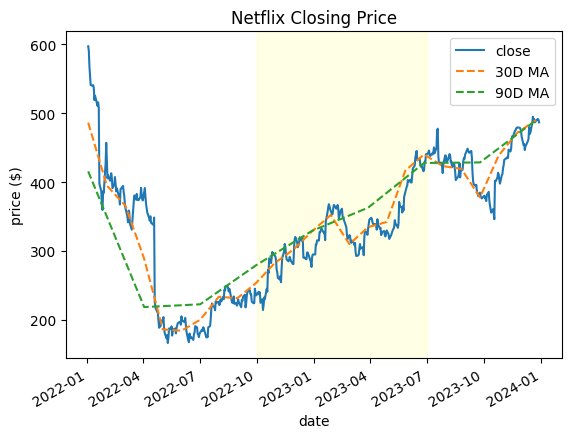

In [40]:
#closing price over time, indicate where the max value occurred, add reference line
#specify the duration of the moving averages (here: 30days and 90days)
ax = netflix_viz.moving_average('close', ['30D','90D'])
netflix_viz.shade_region(
    ax,x=('2022-10-01','2023-07-01'), color='yellow', alpha=0.1 #alpha controls the transparency
)
ax.set(title='Netflix Closing Price', ylabel='price ($)')


array([<Axes: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <Axes: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

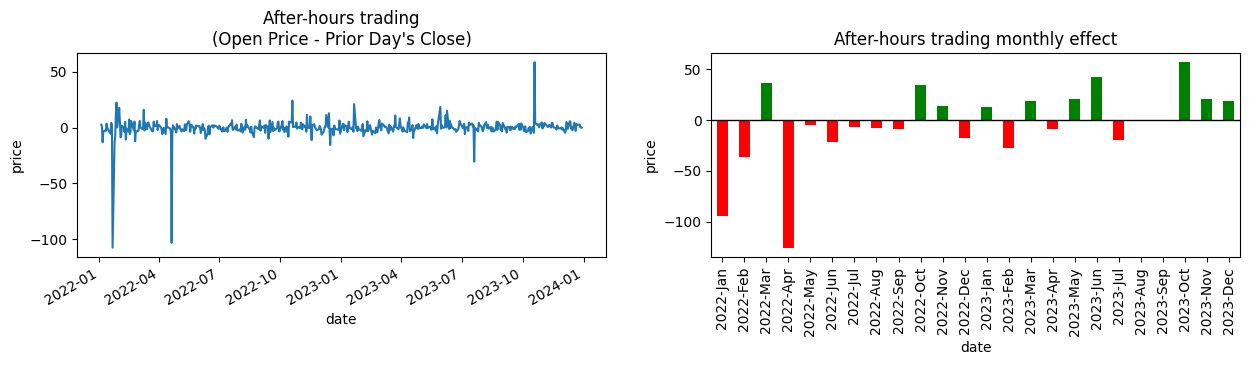

In [41]:
netflix_viz.after_hours_trades()

[Text(0.5, 1.0, 'Netflix Closing Price'), Text(0, 0.5, 'price ($)')]

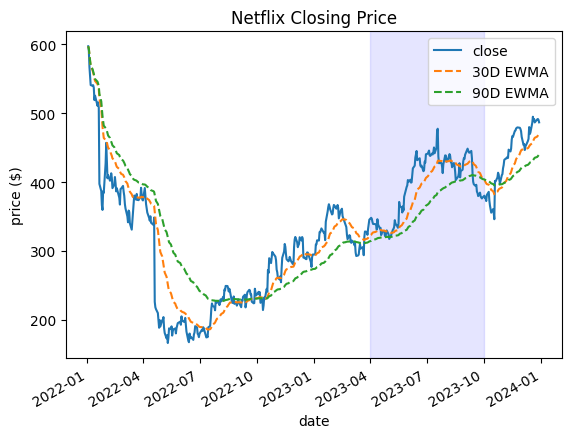

In [47]:
#check exp smoothing: we can place more importance on more recent values
ax = netflix_viz.exp_smoothing('close', [30, 90])
netflix_viz.shade_region(
    ax, x=('2023-04-01', '2023-10-01'), color='blue', alpha=0.1
)
ax.set(title='Netflix Closing Price', ylabel='price ($)')

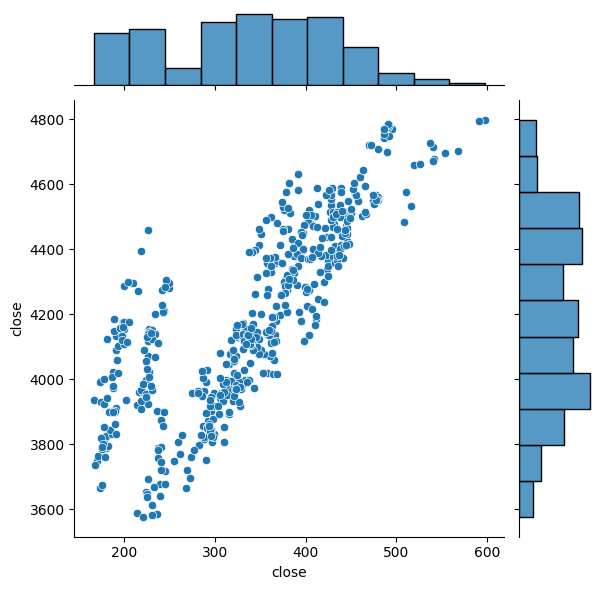

In [48]:
#let's compare netflix to SP500
netflix_viz.jointplot(sp,'close')

<Axes: >

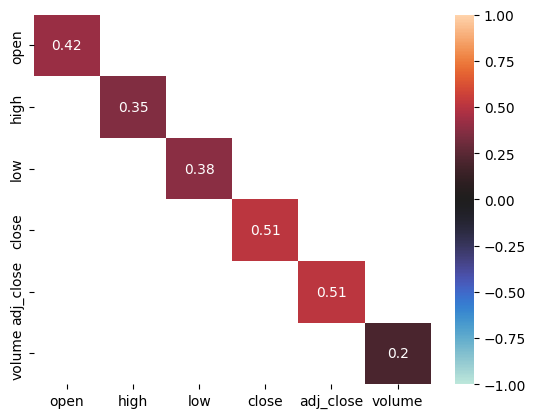

In [49]:
#how meta correlates with netflix
netflix_viz.correlation_heatmap(meta)

<Axes: ylabel='price'>

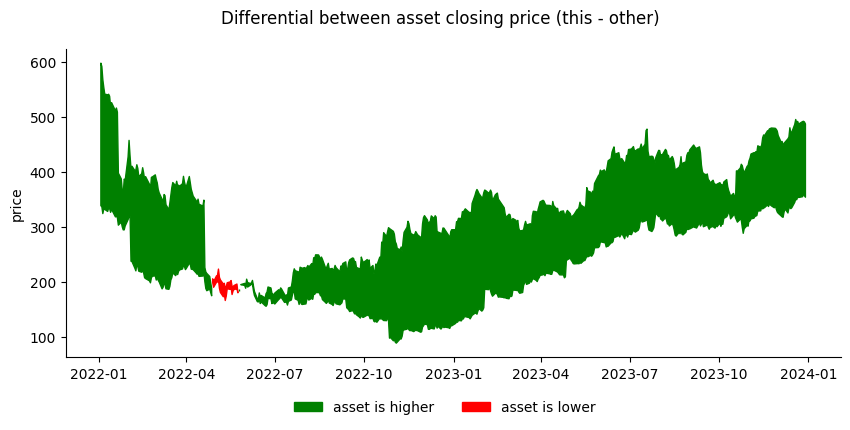

In [50]:
#how meta gre(or fell) in price compared to netflix
netflix_viz.fill_between_other(meta)

/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Data_Analysis_with_Pandas/stock-analysis/stock_analysis/stock_visualizer.py:640: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pivot = pivot.pct_change()


<Axes: xlabel='name', ylabel='name'>

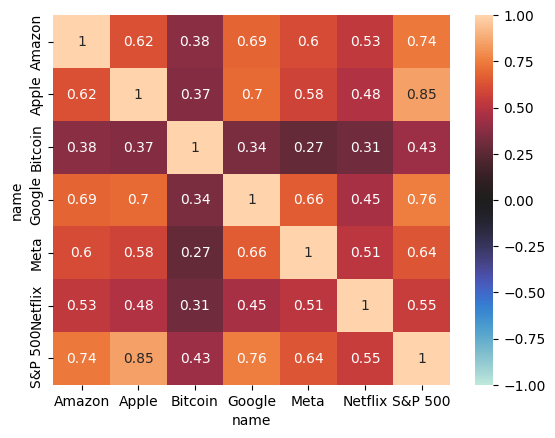

In [51]:
#visualize group of assets
all_assets_viz = stock_analysis.AssetGroupVisualizer(all_assets)
all_assets_viz.heatmap()
#google, amzn, sp50 have the strongest correlation

<Axes: xlabel='date'>

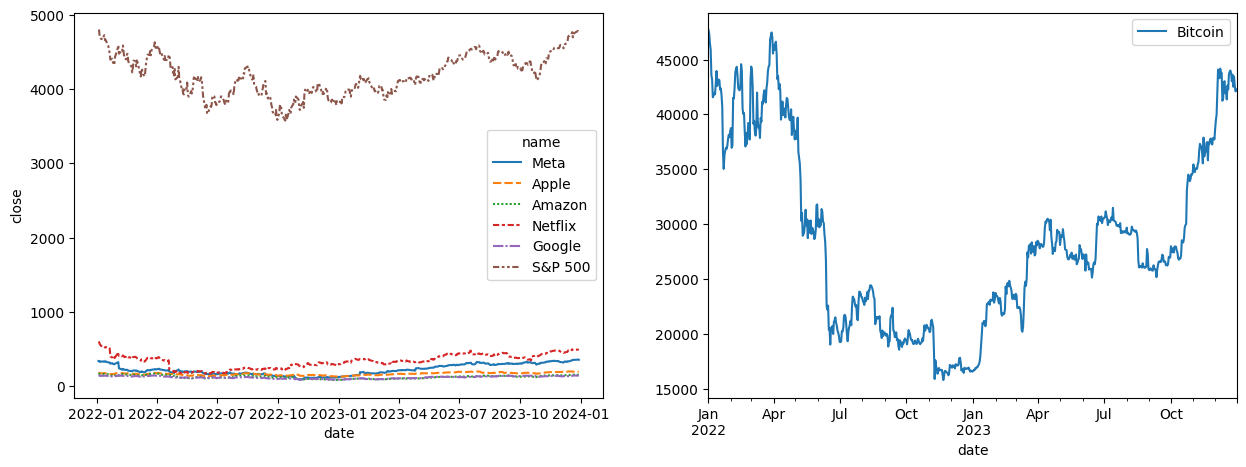

In [52]:
maang_sp_viz = stock_analysis.AssetGroupVisualizer(maang_sp)
bitcoin_viz = stock_analysis.StockVisualizer(bitcoin)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
maang_sp_viz.evolution_over_time('close', ax=axes[0], style=maang_sp_viz.group_by)
bitcoin_viz.evolution_over_time('close', ax=axes[1], label='Bitcoin')

array([[<Axes: title={'center': "Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Meta Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Meta after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Netflix Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center':

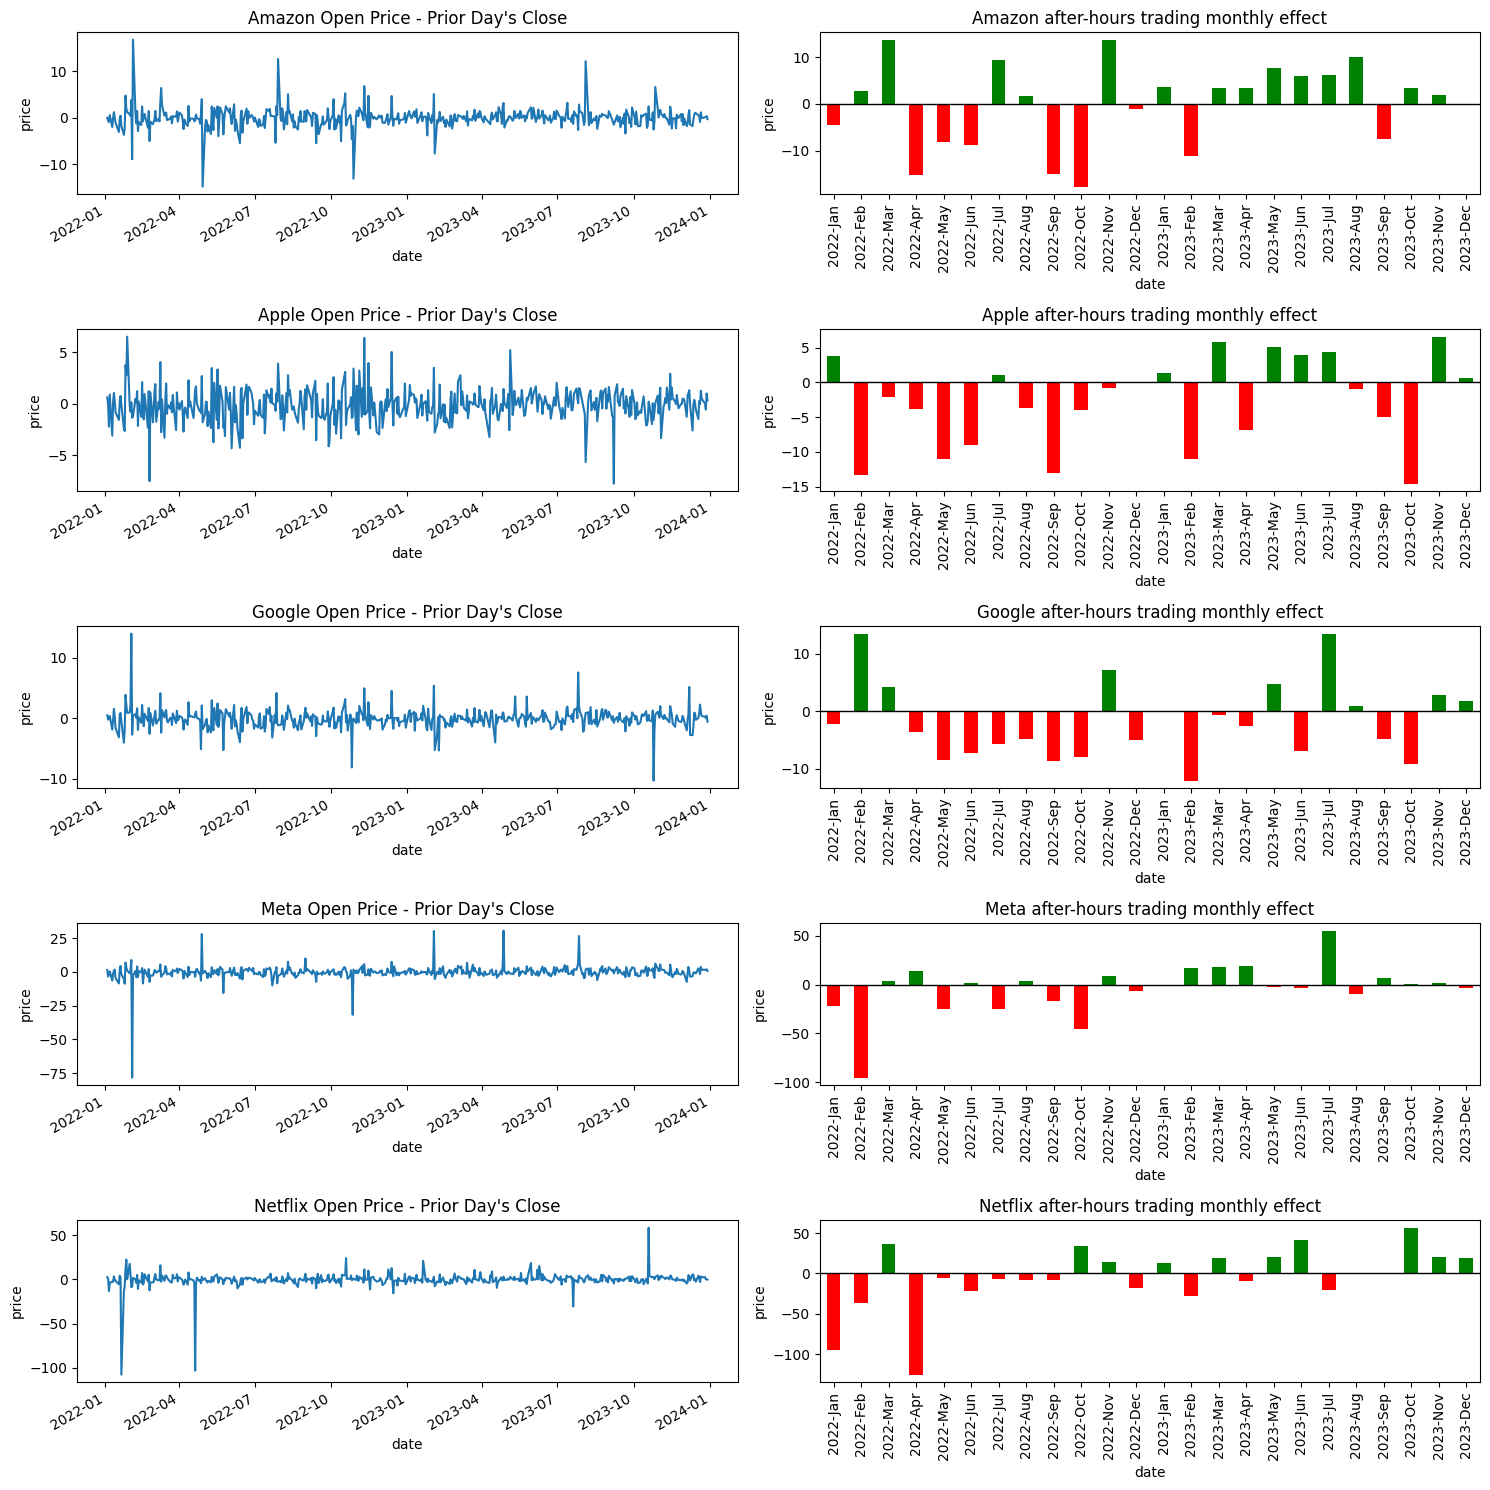

In [53]:
maang_viz = stock_analysis.AssetGroupVisualizer(maang)
maang_viz.after_hours_trades()

<Axes: xlabel='date'>

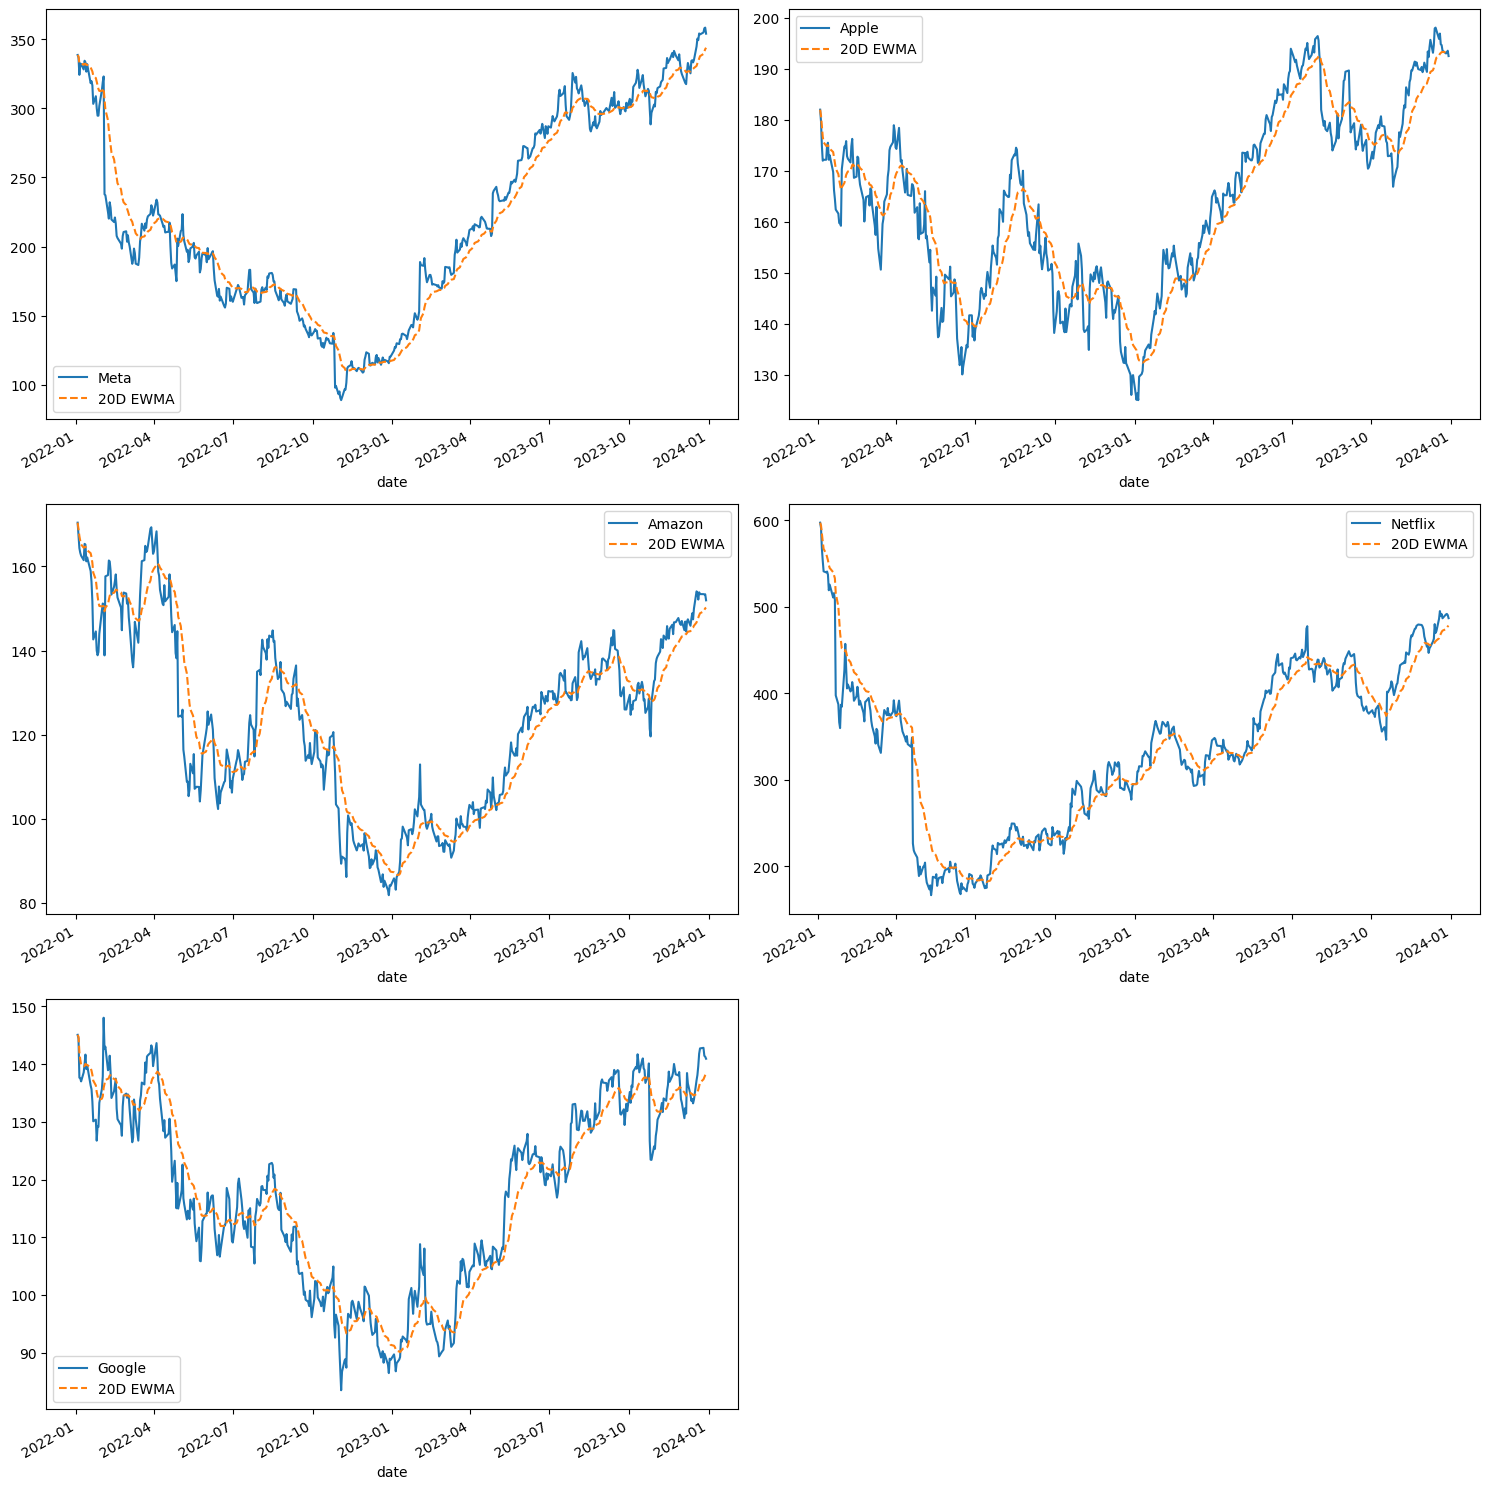

In [54]:
#exp smoothing moving average (EMA) for Maang
maang_viz.exp_smoothing('close', 20)

array([<Axes: title={'center': 'Amazon - close'}, xlabel='close', ylabel='Count'>,
       <Axes: title={'center': 'Apple - close'}, xlabel='close', ylabel='Count'>,
       <Axes: title={'center': 'Google - close'}, xlabel='close', ylabel='Count'>,
       <Axes: title={'center': 'Meta - close'}, xlabel='close', ylabel='Count'>,
       <Axes: title={'center': 'Netflix - close'}, xlabel='close', ylabel='Count'>,
       <Axes: >], dtype=object)

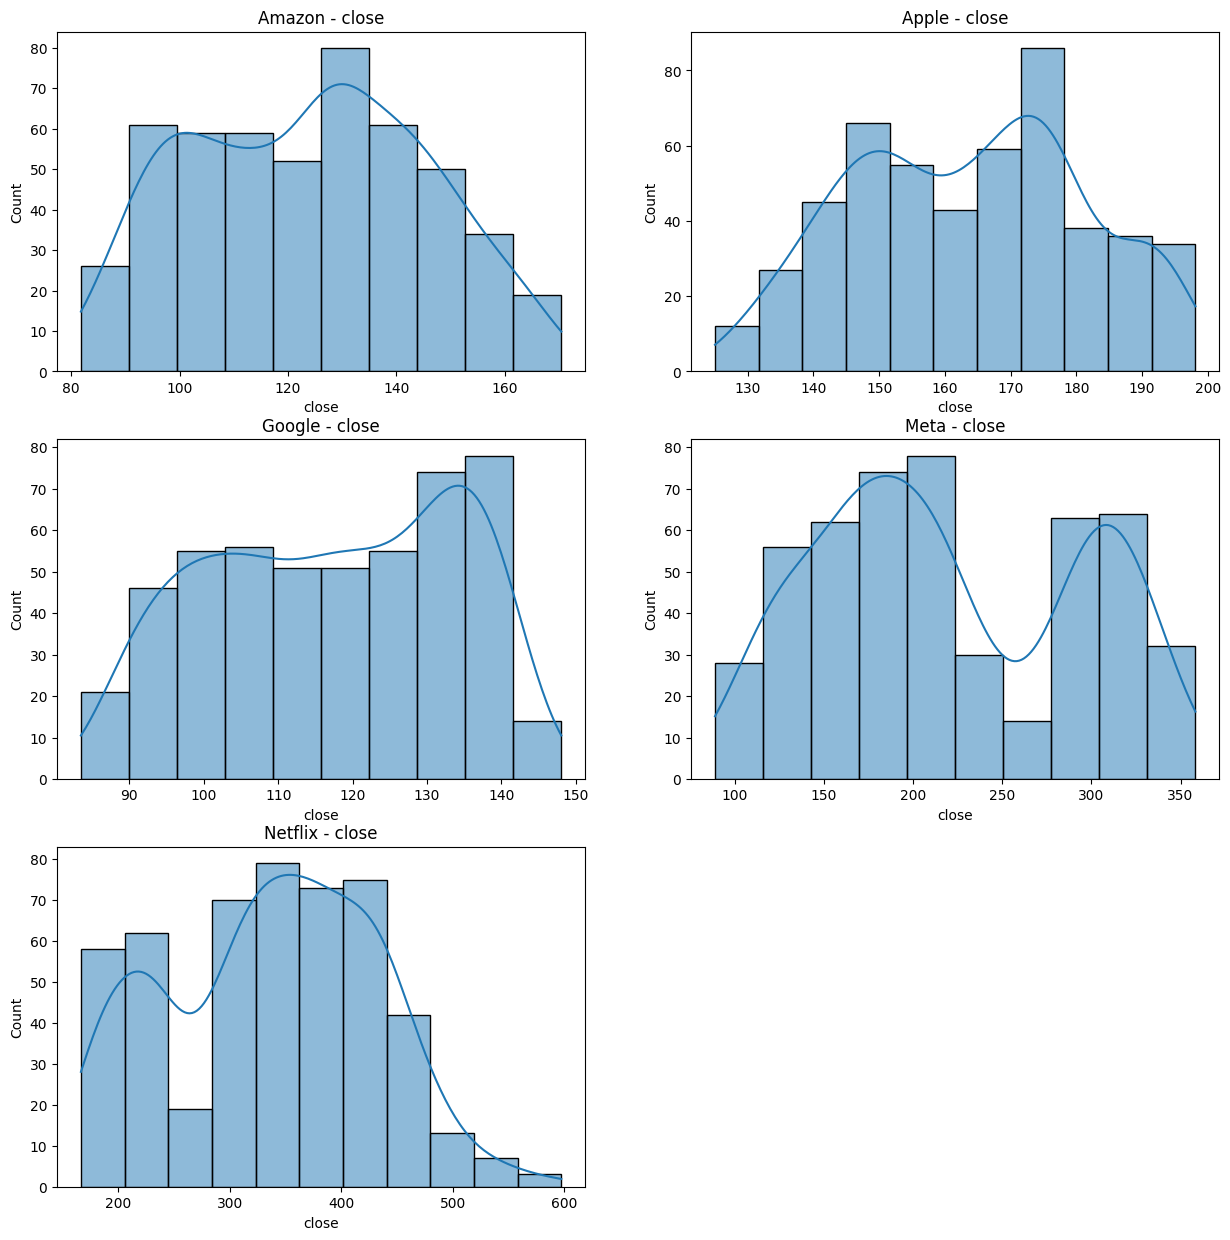

In [55]:
#distribution of closing price in Maang
maang_viz.histogram('close')

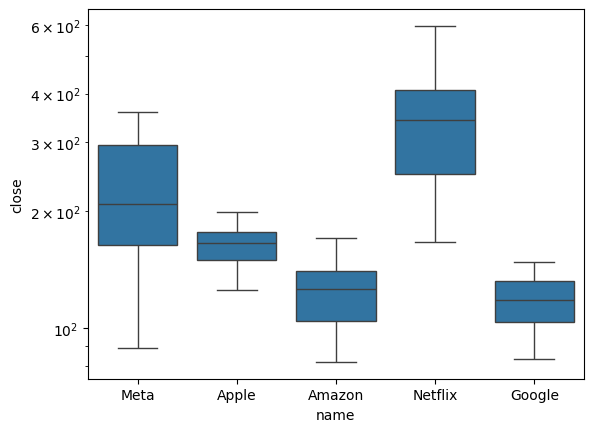

In [56]:
#box plot of close in Maang
maang_viz.boxplot('close')
plt.yscale('log')

## Technical Analysis of Financial Instruments

In [57]:
#calculate metrics with StockAnalyzer
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)

In [59]:
# annual volatility:the degree of variation of a trading price series over time.
nflx_analyzer.annualized_volatility()

0.3769763528011781

In [60]:
all_assets_analyzer = stock_analysis.AssetGroupAnalyzer(all_assets)

In [61]:
#check on sd in terms of the mean of the stock price --> also volatility measure
all_assets_analyzer.analyze('cv')

{'Amazon': 0.175054131403182,
 'Apple': 0.1081649937463018,
 'Bitcoin': 0.2920515484588949,
 'Google': 0.1390992348256796,
 'Meta': 0.32803220304507996,
 'Netflix': 0.2774872169332116,
 'S&P 500': 0.06646013102662225}

In [62]:
all_assets_analyzer.analyze('annualized_volatility')

{'Amazon': 0.3299273755267538,
 'Apple': 0.20387096109547087,
 'Bitcoin': 0.3223781620415647,
 'Google': 0.30561755704785376,
 'Meta': 0.3988036717498784,
 'Netflix': 0.3769763528011781,
 'S&P 500': 0.13149985054011776}

In [63]:
#bull market: whether assets value increased >20% in the last 2 months
all_assets_analyzer.analyze('is_bull_market')

/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Data_Analysis_with_Pandas/stock-analysis/stock_analysis/stock_analyzer.py:217: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.portfolio_return(self.data.last('2M')) >= .2
/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Data_Analysis_with_Pandas/stock-analysis/stock_analysis/stock_analyzer.py:182: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start, end = df.close[0], df.close[-1]


{'Amazon': False,
 'Apple': False,
 'Bitcoin': False,
 'Google': False,
 'Meta': False,
 'Netflix': False,
 'S&P 500': False}

In [64]:

#bear_market_ whether assets values decreased >20% in the last 2 months
all_assets_analyzer.analyze('is_bear_market')

/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Data_Analysis_with_Pandas/stock-analysis/stock_analysis/stock_analyzer.py:210: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.portfolio_return(self.data.last('2M')) <= -.2
/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Data_Analysis_with_Pandas/stock-analysis/stock_analysis/stock_analyzer.py:182: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start, end = df.close[0], df.close[-1]


{'Amazon': False,
 'Apple': False,
 'Bitcoin': False,
 'Google': False,
 'Meta': False,
 'Netflix': False,
 'S&P 500': False}

In [65]:
#quantifies the relationship between the price movements of a particular asset and the overall market
all_assets_analyzer.analyze('beta', index=sp)

{'Amazon': 1.6205577166119125,
 'Apple': 1.2637273628309558,
 'Bitcoin': 1.1981634540471233,
 'Google': 1.3599385337409426,
 'Meta': 1.76113573102404,
 'Netflix': 1.5857816328454915,
 'S&P 500': 0.9999999999999998}

Text(0.5, 0.98, 'Cumulative Returns')

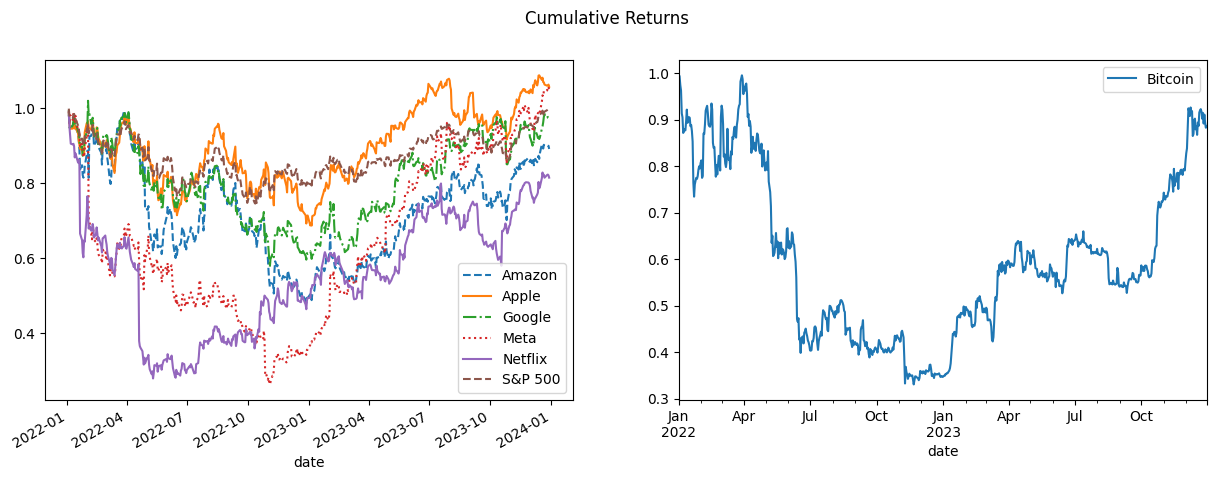

In [66]:
#Cumulative return is a measure of the total amount of return generated by an investment over 
#a specified period. It represents the aggregated performance of an investment, 
#taking into account both capital appreciation (increase in the asset's value) 
#and any income generated by the investment, such as dividends or interest

from cycler import cycler

# to make this a little easier to see in the black and white text
bw_viz_cycler = (
    cycler(color=[plt.get_cmap('tab10')(x/10) for x in range(10)])
    + cycler(linestyle=['dashed', 'solid', 'dashdot', 'dotted', 'solid'] * 2)
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_prop_cycle(bw_viz_cycler)
cumulative_returns = all_assets_analyzer.analyze('cumulative_returns')

for name, data in cumulative_returns.items():
    data.plot(
        ax=axes[1] if name == 'Bitcoin' else axes[0], 
        label=name,
        legend=True
    )
fig.suptitle('Cumulative Returns')